In [1]:
!pip install requests beautifulsoup4 konlpy pandas tqdm matplotlib wordcloud transformers torch sentencepiece

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 495.9/495.9 kB 12.3 MB/s eta 0:00:00


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from tqdm import tqdm
from konlpy.tag import Okt
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from transformers import pipeline

# 데이터 수집

In [3]:
urls = [
    # 2025
    "https://news.jtbc.co.kr/article/NB12246074?influxDiv=NAVER",
    "https://news.jtbc.co.kr/article/NB12247576?influxDiv=NAVER",
    "https://news.jtbc.co.kr/article/NB12247573?influxDiv=NAVER",
    "https://news.jtbc.co.kr/article/NB12267332?influxDiv=NAVER",
    "https://news.jtbc.co.kr/article/NB12261907?influxDiv=NAVER",
    "https://news.jtbc.co.kr/article/NB12248483?influxDiv=NAVER",
    "https://news.jtbc.co.kr/article/NB12247573?influxDiv=NAVER",

    # 2024
    "https://news.jtbc.co.kr/article/NB12222244?influxDiv=NAVER",
    "https://news.jtbc.co.kr/article/NB12221368?influxDiv=NAVER",
    "https://news.jtbc.co.kr/article/NB12212794",
    "https://news.jtbc.co.kr/article/NB12229094?influxDiv=NAVER",
    "https://news.jtbc.co.kr/article/NB12207408",
    "https://news.jtbc.co.kr/article/NB12209252",
    "https://news.jtbc.co.kr/article/NB12193605",
    "https://news.jtbc.co.kr/article/NB12217453",
    "https://news.jtbc.co.kr/article/NB12217544",
    "https://news.jtbc.co.kr/article/NB12214917",
    "https://news.jtbc.co.kr/article/NB12208657",
    "https://news.jtbc.co.kr/article/NB12209170",
    "https://news.jtbc.co.kr/article/NB12209398",
    "https://news.jtbc.co.kr/article/NB12204653",
    "https://news.jtbc.co.kr/article/NB12198928",
    "https://news.jtbc.co.kr/article/NB12197297",
    "https://news.jtbc.co.kr/article/NB12194874",
    "https://news.jtbc.co.kr/article/NB12166626",
    "https://news.jtbc.co.kr/article/NB12168575",
    "https://news.jtbc.co.kr/article/NB12162133",
    "https://news.jtbc.co.kr/article/NB12165779",
    "https://news.jtbc.co.kr/article/NB12160789",
    # 2023
    "https://news.jtbc.co.kr/article/NB12148037",
    "https://news.jtbc.co.kr/article/NB12144903",
    "https://news.jtbc.co.kr/article/NB12157423",
    "https://news.jtbc.co.kr/article/NB12144802",
    "https://news.jtbc.co.kr/article/NB12136902",
    "https://news.jtbc.co.kr/article/NB12134397",
    "https://news.jtbc.co.kr/article/NB12133625",
    "https://news.jtbc.co.kr/article/NB12120407",
    "https://news.jtbc.co.kr/article/NB12153496",
    "https://news.jtbc.co.kr/article/NB12154016",
    "https://news.jtbc.co.kr/article/NB12152775",
    "https://news.jtbc.co.kr/article/NB12150852",
    "https://news.jtbc.co.kr/article/NB12150810",
    "https://news.jtbc.co.kr/article/NB12142946",
    "https://news.jtbc.co.kr/article/NB12136721",
    "https://news.jtbc.co.kr/article/NB12138051",
    "https://news.jtbc.co.kr/article/NB12137495",
    "https://news.jtbc.co.kr/article/NB12133484",
    "https://news.jtbc.co.kr/article/NB12132460",
    "https://news.jtbc.co.kr/article/NB12133172",
    "https://news.jtbc.co.kr/article/NB12132136",
    "https://news.jtbc.co.kr/article/NB12132418",
    "https://news.jtbc.co.kr/article/NB12128355",
    "https://news.jtbc.co.kr/article/NB12130176",
    "https://news.jtbc.co.kr/article/NB12127386",
    "https://news.jtbc.co.kr/article/NB12122770",
    "https://news.jtbc.co.kr/article/NB12122712",
    # 2022
    "https://news.jtbc.co.kr/article/NB12076264",
    "https://news.jtbc.co.kr/article/NB12082267",
    "https://news.jtbc.co.kr/article/NB12082224",
    "https://news.jtbc.co.kr/article/NB12107102",
    "https://news.jtbc.co.kr/article/NB12091325",
    "https://news.jtbc.co.kr/article/NB12082407",
    "https://news.jtbc.co.kr/article/NB12083180",
    "https://news.jtbc.co.kr/article/NB12083136",
    "https://news.jtbc.co.kr/article/NB12082571",
    "https://news.jtbc.co.kr/article/NB12068952",
    "https://news.jtbc.co.kr/article/NB12068938",
    "https://news.jtbc.co.kr/article/NB12066910",
    "https://news.jtbc.co.kr/article/NB12042508"
]

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from tqdm import tqdm
import re  # ✅ ← 꼭 추가해야 함

def extract_article_data(url):
    headers = {
        "User-Agent": (
            "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
            "AppleWebKit/537.36 (KHTML, like Gecko) "
            "Chrome/120.0.0.0 Safari/537.36"
        )
    }
    try:
        response = requests.get(url, headers=headers, timeout=10)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, "html.parser")

        # ✅ 제목 추출 (다양한 구조 대응)
        title_element = soup.select_one(
            ".content90 h1, .article-wrap01 h1, .story-news h1, "
            "h1.tit, h1.tit-title, .article-tit, .title01"
        )
        title = title_element.get_text(strip=True) if title_element else "제목 요소를 찾을 수 없습니다."

        # 🔁 백업 (메타 태그 or <title>)
        if title == "제목 요소를 찾을 수 없습니다.":
            meta_title = soup.find("meta", property="og:title")
            if meta_title and meta_title.get("content"):
                title = meta_title["content"]
            elif soup.title:
                title = soup.title.get_text(strip=True)

        # ✅ 본문 추출 (JTBC 구조별 대응)
        content_selectors = [
            "#articleWrap p",
            "div#article_body p",
            "div.article_content p",
            "div#news_body_area p",
        ]
        paragraphs = []
        for selector in content_selectors:
            for p in soup.select(selector):
                text = p.get_text(" ", strip=True)
                if any(
                    kw in text for kw in ["제작", "일러스트", "저작권자", "JTBC", "@", "송고"]
                ):
                    continue
                if len(text) < 10:
                    continue
                paragraphs.append(text)
        if not paragraphs:
            paragraphs = [soup.get_text(" ", strip=True)]
        content = " ".join(paragraphs)
        if "세 줄 요약" in content:
            content = content.split("세 줄 요약", 1)[-1]

        # ✅ 연도 추출 (URL 또는 메타태그)
        year_match = re.search(r"20\d{2}", url)
        if not year_match:
            date_meta = soup.find("meta", {"property": "article:published_time"})
            if date_meta and date_meta.get("content"):
                year_match = re.search(r"20\d{2}", date_meta["content"])
        year = int(year_match.group()) if year_match else None

        # ✅ 언론사
        press = "JTBC"

        return {
            "year": year,
            "press": press,
            "title": title,
            "content": content,
            "url": url,
        }

    except Exception as e:
        print(f"⚠️ {url} 오류: {e}")
        return None


# ✅ 실행
article_data = []
error_log = []

for url in tqdm(urls, desc="📡 JTBC 기사 수집 중..."):
    data = extract_article_data(url)
    if data:
        article_data.append(data)
    else:
        error_log.append(url)

# ✅ DataFrame 변환 및 저장
df = pd.DataFrame(article_data)
df.to_csv("jtbc_domestic_violence_with_year.csv", index=False, encoding="utf-8-sig")

print(f"\n✅ 총 {len(df)}개 기사 수집 완료 (연도+언론사 컬럼 포함)")
if error_log:
    print(f"⚠️ 실패한 URL {len(error_log)}개 → jtbc_error_log.txt로 저장됨")
    with open("jtbc_error_log.txt", "w", encoding="utf-8") as f:
        f.write("\n".join(error_log))


📡 JTBC 기사 수집 중...: 100%|██████████| 69/69 [00:47<00:00,  1.45it/s]


✅ 총 69개 기사 수집 완료 (연도+언론사 컬럼 포함)


# 데이터 전처리

In [5]:
# ✅ 1. Java 설치
!apt-get update -q
!apt-get install -y openjdk-11-jdk

# ✅ 2. 환경 변수 설정
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["PATH"] += os.pathsep + os.path.join(os.environ["JAVA_HOME"], "bin")

# ✅ 3. KoNLPy 설치
!pip install konlpy

# ✅ 4. 다시 Okt 불러오기
from konlpy.tag import Okt
okt = Okt()

print("✅ KoNLPy와 Java 환경 준비 완료!")


Hit:1 https://cli.github.com/packages stable InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [83.6 kB]
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [2,196 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Hit:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main 

In [6]:
def clean_text(text):
    text = text.replace('\n', ' ').replace('\r', ' ')
    text = text.replace('\t', ' ').replace('▶', '').replace('▲', '')
    return text.strip()

df["clean_text"] = df["content"].apply(clean_text)
df["tokens"] = df["clean_text"].apply(
    lambda x: [word for word, pos in okt.pos(x) if pos in ['Noun', 'Adjective']]
)

In [7]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 32.8 MB/s eta 0:00:00


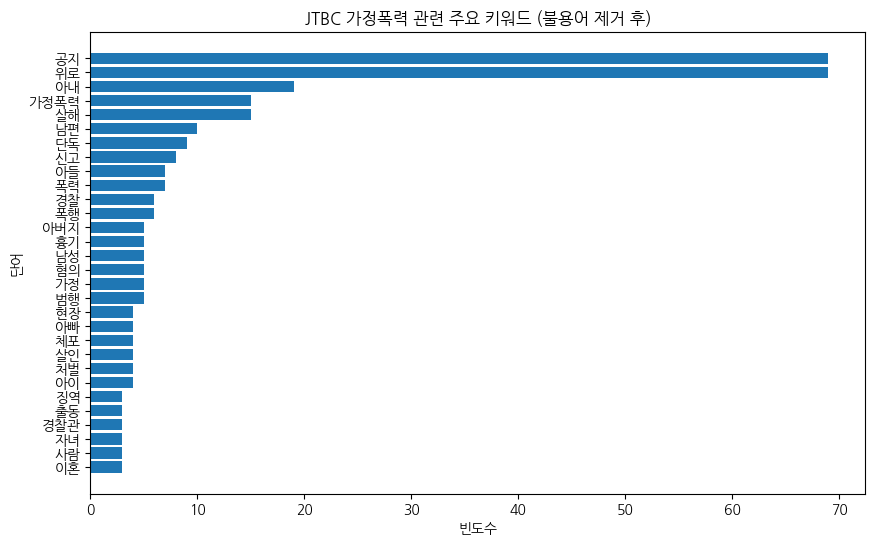

In [8]:
from konlpy.tag import Okt
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

okt = Okt()

# ✅ 텍스트 전처리
def clean_text(text):
    text = text.replace('\n', ' ').replace('\r', ' ')
    text = text.replace('\t', ' ').replace('▶', '').replace('▲', '')
    return text.strip()

df["clean_text"] = df["content"].apply(clean_text)

# ✅ 불용어 사전 정의
stopwords = [
    "더", "등", "및", "이", "그", "저", "것", "수", "등등", "중", "또", "로", "으로",
    "하다", "되다", "있다", "없다", "이다", "가", "을", "를", "의", "에서", "에게",
    "도", "으로", "하는", "했다", "하며", "하고", "까지", "라고", "이라고",
    "공식", "사항", "보기", "위해", "대한", "관련", "위", "이번", "지난", "해",
    "당시", "최근", "보도", "뉴스", "기자", "사진", "제공", "자료", "영상", "출처",
    "경우", "이후", "때문", "지난해", "올해", "통해", "지난달", "것으로", "밝혔다"
]

# ✅ 형태소 분석 + 불용어 제거
df["tokens"] = df["clean_text"].apply(
    lambda x: [
        word for word, pos in okt.pos(x)
        if pos in ["Noun", "Adjective"] and word not in stopwords and len(word) > 1
    ]
)

# ✅ 키워드 빈도수 계산
all_tokens = sum(df["tokens"], [])
counter = Counter(all_tokens)
keywords = pd.DataFrame(counter.most_common(30), columns=["단어", "빈도"])

# ✅ 시각화
plt.figure(figsize=(10, 6))
plt.barh(keywords["단어"], keywords["빈도"])
plt.gca().invert_yaxis()
plt.title("JTBC 가정폭력 관련 주요 키워드 (불용어 제거 후)")
plt.xlabel("빈도수")
plt.ylabel("단어")
plt.show()


In [9]:
!apt-get update -qq
!apt-get install -y fonts-nanum


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 65 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (4,914 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 122765 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


# 워드클라우드

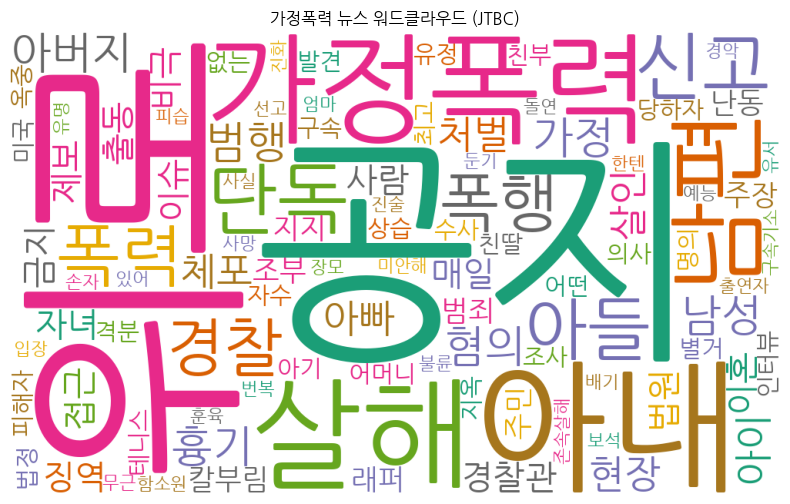

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"  # 위에서 확인한 정확한 경로로 수정

wc = WordCloud(
    font_path=font_path,
    background_color="white",
    width=1000,
    height=600,
    colormap="Dark2",
    max_words=100,
    min_font_size=10
)

plt.figure(figsize=(10,6))
plt.imshow(wc.generate_from_frequencies(counter))
plt.axis("off")
plt.title("가정폭력 뉴스 워드클라우드 (JTBC)")
plt.show()


# 감성분석

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/895 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/711M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/711M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/367 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:02<?, ?B/s]

Device set to use cpu


📰 총 69개 기사 분석 예정
🧠 감성 분석 진행 중...
💾 저장 완료 → jtbc_sentiment_results.csv


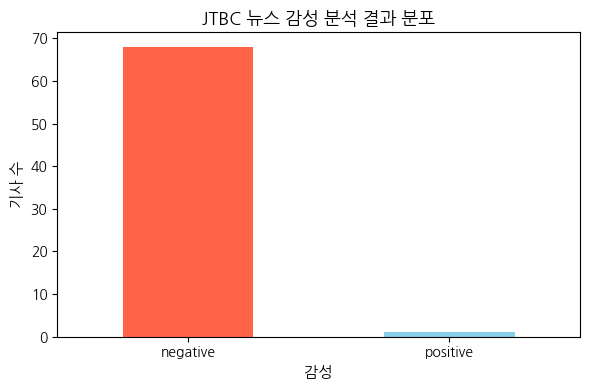


📊 전체 감성 비율:
sentiment
negative    0.986
positive    0.014
Name: proportion, dtype: float64


In [11]:
# ============================================================
# 1️⃣ 라이브러리 설치 및 불러오기
# ============================================================
!pip install transformers torch pandas matplotlib konlpy --quiet

import pandas as pd
import matplotlib.pyplot as plt
from transformers import pipeline

# ============================================================
# 2️⃣ 감성 분석 파이프라인 (공개된 한국어 감성 모델)
# ============================================================
sentiment_analyzer = pipeline(
    "text-classification",
    model="WhitePeak/bert-base-cased-Korean-sentiment",  # ✅ 공개 한국어 감성 모델
    tokenizer="WhitePeak/bert-base-cased-Korean-sentiment",
    truncation=True,
    max_length=512
)

# ============================================================
# 3️⃣ 긴 문장 분할 및 감성 분석 함수
# ============================================================
def chunk_text(text, max_length=400):
    """긴 문장을 적당히 나누어 BERT 입력 토큰 제한을 회피"""
    if not isinstance(text, str) or len(text.strip()) == 0:
        return []
    sentences = text.replace('\n',' ').split("다.")
    chunks, chunk = [], ""
    for s in sentences:
        s = s.strip()
        if not s:
            continue
        if len(chunk + s + "다.") > max_length and chunk:
            chunks.append(chunk + "다.")
            chunk = s
        else:
            chunk += s + "다."
    if chunk.strip():
        chunks.append(chunk.strip())
    return chunks


def analyze_long_text(text):
    """문단 단위 감성 분석 및 다수결 판단"""
    chunks = chunk_text(text)
    if not chunks:
        return {"sentiment":"neutral","confidence":0.5}
    try:
        results = sentiment_analyzer(chunks)
        pos = sum(1 for r in results if "LABEL_1" in r["label"] or "positive" in r["label"].lower())
        neg = sum(1 for r in results if "LABEL_0" in r["label"] or "negative" in r["label"].lower())
        total = pos + neg
        if total == 0:
            return {"sentiment":"neutral","confidence":0.5}
        if pos > neg:
            sentiment = "positive"
        elif neg > pos:
            sentiment = "negative"
        else:
            sentiment = "neutral"
        confidence = round(abs(pos-neg)/total,3)
        return {"sentiment": sentiment, "confidence": confidence}
    except Exception as e:
        print(f"⚠️ 감성 분석 실패: {e}")
        return {"sentiment":"neutral","confidence":0.5}


# ============================================================
# 4️⃣ 부정 키워드 기반 자동 교정 함수
# ============================================================
def keyword_adjustment(text, sentiment):
    """부정 키워드가 많을 경우 긍정 결과를 자동으로 부정으로 조정"""
    negative_keywords = [
        "폭행","살인","혐의","사망","체포","피해자",
        "가정폭력","범죄","징역","고소","재판","처벌",
        "구속","상해","부상","위협","협박","흉기"
    ]
    score = sum(text.count(k) for k in negative_keywords)
    if score >= 3 and sentiment == "positive":
        return "negative"
    return sentiment


# ============================================================
# 5️⃣ 데이터 로드 및 전처리
# ============================================================
df = pd.read_csv("jtbc_domestic_violence_with_year.csv")  # ✅ JTBC 기사 수집 결과 파일
df = df[df["content"].notna()]
df = df[df["content"].str.strip()!=""]
df = df[df["content"].str.len() > 30]
sample_df = df.copy()

print(f"📰 총 {len(sample_df)}개 기사 분석 예정")

# ============================================================
# 6️⃣ 감성 분석 실행
# ============================================================
print("🧠 감성 분석 진행 중...")
sentiment_results = sample_df["content"].apply(analyze_long_text).tolist()
sentiment_df = pd.DataFrame(sentiment_results)
result_df = pd.concat([sample_df.reset_index(drop=True), sentiment_df], axis=1)

# ✅ 부정 키워드 기반 자동 보정
result_df["sentiment"] = result_df.apply(lambda x: keyword_adjustment(x["content"], x["sentiment"]), axis=1)

# ============================================================
# 7️⃣ 결과 저장
# ============================================================
result_df.to_csv("jtbc_sentiment_results.csv", index=False, encoding="utf-8-sig")
print("💾 저장 완료 → jtbc_sentiment_results.csv")

# ============================================================
# 8️⃣ 전체 감성 분포 시각화
# ============================================================
sentiment_count = result_df["sentiment"].value_counts()

plt.figure(figsize=(6,4))
sentiment_count.plot(kind="bar", color=["tomato", "skyblue", "gray"])
plt.title("JTBC 뉴스 감성 분석 결과 분포", fontsize=13)
plt.xlabel("감성", fontsize=11)
plt.ylabel("기사 수", fontsize=11)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print("\n📊 전체 감성 비율:")
print(result_df["sentiment"].value_counts(normalize=True).round(3))


# 가정폭력 기사 프레임 분포

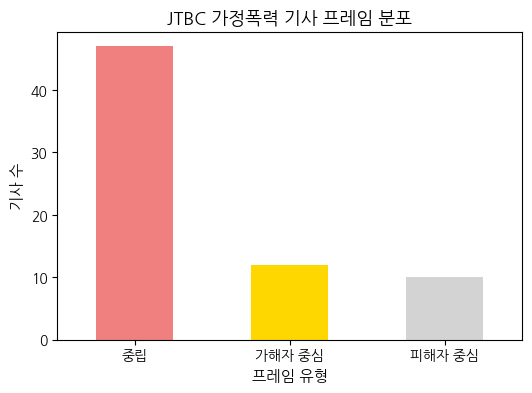


📊 프레임별 기사 비율:
frame
중립        0.681159
가해자 중심    0.173913
피해자 중심    0.144928
Name: count, dtype: float64


In [12]:
# ============================================================
# 1️⃣ 텍스트 정제 및 전처리
# ============================================================
def clean_text(text):
    text = str(text).replace('\n', ' ').replace('\r', ' ')
    text = text.replace('\t', ' ').replace('▶', '').replace('▲', '')
    return text.strip()

df["clean_text"] = df["content"].apply(clean_text)

# ============================================================
# 2️⃣ 프레임 분류 (피해자 중심 vs 가해자 중심)
# ============================================================
victim_words = ["피해자", "신고", "학대", "보호"]
offender_words = ["가해자", "폭행", "혐의", "체포"]

def classify_frame(text):
    v = sum([text.count(w) for w in victim_words])
    o = sum([text.count(w) for w in offender_words])
    if v > o:
        return "피해자 중심"
    elif o > v:
        return "가해자 중심"
    else:
        return "중립"

df["frame"] = df["clean_text"].apply(classify_frame)

# ============================================================
# 3️⃣ 결과 시각화
# ============================================================
frame_dist = df["frame"].value_counts()

plt.figure(figsize=(6,4))
frame_dist.plot(kind="bar", color=["lightcoral", "gold", "lightgray"])
plt.title("JTBC 가정폭력 기사 프레임 분포", fontsize=13)
plt.xlabel("프레임 유형", fontsize=11)
plt.ylabel("기사 수", fontsize=11)
plt.xticks(rotation=0)
plt.show()

print("\n📊 프레임별 기사 비율:")
print(frame_dist / frame_dist.sum())


# 연도별 감정 변화 분석

In [13]:
# ============================================================
# ✅ JTBC 뉴스 기사 연도별 자동 수집 코드 (2022~2025, 연도 인식 오류 수정 완료)
# ============================================================

import requests
from bs4 import BeautifulSoup
import pandas as pd
from tqdm import tqdm
import re
import time

# --------------------------------------------------------
# ✅ 연도별 JTBC 뉴스 URL 리스트
# --------------------------------------------------------
urls_by_year = {
    2025: [
        "https://news.jtbc.co.kr/article/NB12246074?influxDiv=NAVER",
        "https://news.jtbc.co.kr/article/NB12247576?influxDiv=NAVER",
        "https://news.jtbc.co.kr/article/NB12247573?influxDiv=NAVER",
        "https://news.jtbc.co.kr/article/NB12267332?influxDiv=NAVER",
        "https://news.jtbc.co.kr/article/NB12261907?influxDiv=NAVER",
        "https://news.jtbc.co.kr/article/NB12248483?influxDiv=NAVER",
        "https://news.jtbc.co.kr/article/NB12247573?influxDiv=NAVER",
    ],
    2024: [
        "https://news.jtbc.co.kr/article/NB12222244?influxDiv=NAVER",
        "https://news.jtbc.co.kr/article/NB12221368?influxDiv=NAVER",
        "https://news.jtbc.co.kr/article/NB12212794",
        "https://news.jtbc.co.kr/article/NB12229094?influxDiv=NAVER",
        "https://news.jtbc.co.kr/article/NB12207408",
        "https://news.jtbc.co.kr/article/NB12209252",
        "https://news.jtbc.co.kr/article/NB12193605",
        "https://news.jtbc.co.kr/article/NB12217453",
        "https://news.jtbc.co.kr/article/NB12217544",
        "https://news.jtbc.co.kr/article/NB12214917",
        "https://news.jtbc.co.kr/article/NB12208657",
        "https://news.jtbc.co.kr/article/NB12209170",
        "https://news.jtbc.co.kr/article/NB12209398",
        "https://news.jtbc.co.kr/article/NB12204653",
        "https://news.jtbc.co.kr/article/NB12198928",
        "https://news.jtbc.co.kr/article/NB12197297",
        "https://news.jtbc.co.kr/article/NB12194874",
        "https://news.jtbc.co.kr/article/NB12166626",
        "https://news.jtbc.co.kr/article/NB12168575",
        "https://news.jtbc.co.kr/article/NB12162133",
        "https://news.jtbc.co.kr/article/NB12165779",
        "https://news.jtbc.co.kr/article/NB12160789",
    ],
    2023: [
        "https://news.jtbc.co.kr/article/NB12148037",
        "https://news.jtbc.co.kr/article/NB12144903",
        "https://news.jtbc.co.kr/article/NB12157423",
        "https://news.jtbc.co.kr/article/NB12144802",
        "https://news.jtbc.co.kr/article/NB12136902",
        "https://news.jtbc.co.kr/article/NB12134397",
        "https://news.jtbc.co.kr/article/NB12133625",
        "https://news.jtbc.co.kr/article/NB12120407",
        "https://news.jtbc.co.kr/article/NB12153496",
        "https://news.jtbc.co.kr/article/NB12154016",
        "https://news.jtbc.co.kr/article/NB12152775",
        "https://news.jtbc.co.kr/article/NB12150852",
        "https://news.jtbc.co.kr/article/NB12150810",
        "https://news.jtbc.co.kr/article/NB12142946",
        "https://news.jtbc.co.kr/article/NB12136721",
        "https://news.jtbc.co.kr/article/NB12138051",
        "https://news.jtbc.co.kr/article/NB12137495",
        "https://news.jtbc.co.kr/article/NB12133484",
        "https://news.jtbc.co.kr/article/NB12132460",
        "https://news.jtbc.co.kr/article/NB12133172",
        "https://news.jtbc.co.kr/article/NB12132136",
        "https://news.jtbc.co.kr/article/NB12132418",
        "https://news.jtbc.co.kr/article/NB12128355",
        "https://news.jtbc.co.kr/article/NB12130176",
        "https://news.jtbc.co.kr/article/NB12127386",
        "https://news.jtbc.co.kr/article/NB12122770",
        "https://news.jtbc.co.kr/article/NB12122712",
    ],
    2022: [
        "https://news.jtbc.co.kr/article/NB12076264",
        "https://news.jtbc.co.kr/article/NB12082267",
        "https://news.jtbc.co.kr/article/NB12082224",
        "https://news.jtbc.co.kr/article/NB12107102",
        "https://news.jtbc.co.kr/article/NB12091325",
        "https://news.jtbc.co.kr/article/NB12082407",
        "https://news.jtbc.co.kr/article/NB12083180",
        "https://news.jtbc.co.kr/article/NB12083136",
        "https://news.jtbc.co.kr/article/NB12082571",
        "https://news.jtbc.co.kr/article/NB12068952",
        "https://news.jtbc.co.kr/article/NB12068938",
        "https://news.jtbc.co.kr/article/NB12066910",
        "https://news.jtbc.co.kr/article/NB12042508",
    ],
}

# ------------------------------------------------------------
# ✅ 기사 데이터 추출 함수
# ------------------------------------------------------------
def extract_article_data(url, year=None):
    headers = {
        "User-Agent": (
            "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
            "AppleWebKit/537.36 (KHTML, like Gecko) "
            "Chrome/120.0.0.0 Safari/537.36"
        )
    }

    try:
        response = requests.get(url, headers=headers, timeout=10)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, "html.parser")

        # ✅ 제목 추출
        title_element = soup.select_one(
            ".content90 h1, .article-wrap01 h1, .story-news h1, "
            "h1.tit, h1.tit-title, .article-tit, .title01"
        )
        title = title_element.get_text(strip=True) if title_element else "제목 요소를 찾을 수 없습니다."

        # 🔁 백업 (meta 태그나 <title>에서)
        if title == "제목 요소를 찾을 수 없습니다.":
            meta_title = soup.find("meta", property="og:title")
            if meta_title and meta_title.get("content"):
                title = meta_title["content"]
            elif soup.title:
                title = soup.title.get_text(strip=True)

        # ✅ 본문 추출
        content_selectors = [
            "#articleWrap p",
            "div#article_body p",
            "div.article_content p",
            "div#news_body_area p",
        ]
        paragraphs = []
        for selector in content_selectors:
            for p in soup.select(selector):
                text = p.get_text(" ", strip=True)
                if any(kw in text for kw in ["제작", "일러스트", "저작권자", "JTBC", "@", "송고"]):
                    continue
                if len(text) < 10:
                    continue
                paragraphs.append(text)

        if not paragraphs:
            paragraphs = [soup.get_text(" ", strip=True)]
        content = " ".join(paragraphs)
        if "세 줄 요약" in content:
            content = content.split("세 줄 요약", 1)[-1]

        # ✅ 연도 추출 (수정된 버전)
        year = year  # 기본값 (urls_by_year 딕셔너리에서 전달된 값 사용)

        # 1️⃣ 메타 태그(article:published_time) 우선
        date_meta = soup.find("meta", {"property": "article:published_time"})
        if date_meta and date_meta.get("content"):
            year_match = re.search(r"20\d{2}", date_meta["content"])
            if year_match:
                year = int(year_match.group())

        # 2️⃣ 메타에 없으면 URL 내 /2024/ 같은 패턴 탐색
        if year is None:
            year_match = re.search(r"/(20\d{2})/", url)
            if year_match:
                year = int(year_match.group(1))

        # ✅ 언론사
        press = "JTBC"

        return {
            "year": year,
            "press": press,
            "title": title,
            "content": content,
            "url": url,
        }

    except Exception as e:
        print(f"⚠️ {url} 오류: {e}")
        return None

# ------------------------------------------------------------
# ✅ 실행 및 저장
# ------------------------------------------------------------
article_data = []
error_log = []

for year, url_list in urls_by_year.items():
    for url in tqdm(url_list, desc=f"📡 {year}년 기사 수집 중"):
        data = extract_article_data(url, year)
        if data:
            article_data.append(data)
        else:
            error_log.append(url)
        time.sleep(0.8)  # JTBC 서버 부하 방지

# ✅ DataFrame 변환 및 저장
df = pd.DataFrame(article_data)
df.to_csv("jtbc_domestic_violence_with_year.csv", index=False, encoding="utf-8-sig")

print(f"\n✅ 총 {len(df)}개 기사 수집 완료 (연도+언론사 포함)")
if error_log:
    print(f"⚠️ 실패한 URL {len(error_log)}개 → jtbc_error_log.txt로 저장됨")
    with open("jtbc_error_log.txt", "w", encoding="utf-8") as f:
        f.write("\n".join(error_log))


📡 2022년 기사 수집 중: 100%|██████████| 13/13 [00:18<00:00,  1.46s/it]


✅ 총 69개 기사 수집 완료 (연도+언론사 포함)


In [14]:
# ============================================================
# ✅ JTBC 기사 감정 분석 및 연도별 시각화
# ============================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from transformers import pipeline

# ------------------------------------------------------------
# ✅ 1. 데이터 불러오기
# ------------------------------------------------------------
df = pd.read_csv("jtbc_domestic_violence_with_year.csv")

# 내용이 비어있거나 너무 짧은 기사 제거
df = df[df["content"].str.len() > 30].reset_index(drop=True)
print(f"📰 분석 대상 기사 수: {len(df)}개")

# ------------------------------------------------------------
# ✅ 2. 감정 분석 모델 불러오기
# ------------------------------------------------------------
print("🧠 감정 분석 모델 로딩 중...")
model_name = "j-hartmann/emotion-english-distilroberta-base"  # 다국어 감정분석 모델
emotion_analyzer = pipeline("text-classification", model=model_name, return_all_scores=True)

# ------------------------------------------------------------
# ✅ 3. 감정 분석 수행
# ------------------------------------------------------------
emotion_labels = ['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise']
results = []

for text in tqdm(df["content"], desc="⚙️ 감정 분석 중..."):
    try:
        emotions = emotion_analyzer(text[:512])  # 512 토큰까지만 분석
        scores = {item['label'].lower(): item['score'] for item in emotions[0]}
        results.append(scores)
    except Exception as e:
        print(f"⚠️ 오류 발생: {e}")
        results.append({label: 0 for label in emotion_labels})

emotion_df = pd.DataFrame(results)
df_emotion = pd.concat([df, emotion_df], axis=1)

# ------------------------------------------------------------
# ✅ 4. 연도별 평균 감정 점수 계산
# ------------------------------------------------------------
yearly_emotions = (
    df_emotion.groupby("year")[emotion_labels]
    .mean()
    .reset_index()
)

print("\n📊 연도별 감정 평균 점수:")
print(yearly_emotions)

📰 분석 대상 기사 수: 69개
🧠 감정 분석 모델 로딩 중...


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/329M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cpu
/usr/local/lib/python3.12/dist-packages/transformers/pipelines/text_classification.py:111: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(

⚙️ 감정 분석 중...: 100%|██████████| 69/69 [00:30<00:00,  2.28it/s]



📊 연도별 감정 평균 점수:
   year     anger   disgust      fear       joy   neutral   sadness  surprise
0  2022  0.065186  0.023528  0.189349  0.046838  0.516546  0.111701  0.046852
1  2023  0.060631  0.020504  0.168187  0.044042  0.544449  0.110932  0.051255
2  2024  0.057848  0.021054  0.164617  0.042274  0.564693  0.099137  0.050377
3  2025  0.068693  0.020563  0.197961  0.047120  0.482890  0.111658  0.071115


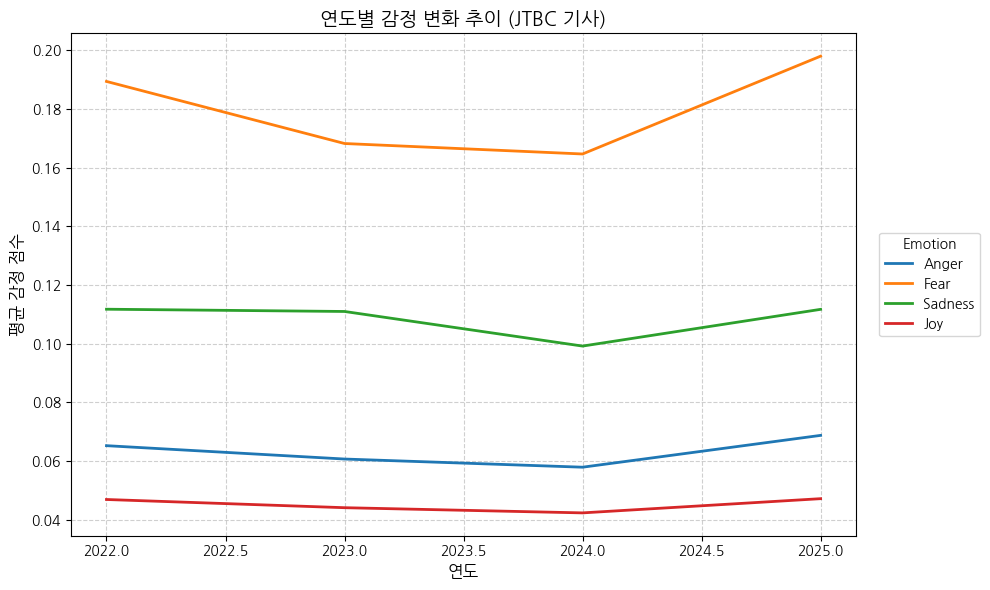

In [15]:
# ------------------------------------------------------------
# ✅ 5. 시각화 (연도별 감정 변화)
# ------------------------------------------------------------
# ⚙️ year 타입 보정 및 정렬
yearly_emotions["year"] = yearly_emotions["year"].astype(int)
yearly_emotions = yearly_emotions.sort_values("year")

plt.figure(figsize=(10, 6))
for emotion in ['anger', 'fear', 'sadness', 'joy']:
    sns.lineplot(
        data=yearly_emotions,
        x="year",
        y=emotion,
        label=emotion.capitalize(),
        linewidth=2
    )

plt.title("연도별 감정 변화 추이 (JTBC 기사)", fontsize=14)
plt.xlabel("연도", fontsize=12)
plt.ylabel("평균 감정 점수", fontsize=12)

# ✅ 범례를 그래프 오른쪽 바깥으로 이동
plt.legend(
    title="Emotion",
    loc="center left",           # 왼쪽 정렬
    bbox_to_anchor=(1.02, 0.5),  # 그래프 바깥 오른쪽에 배치
    frameon=True
)

plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()
